In [56]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Not much useful
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline
#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
elec_con=pd.read_csv('total-electricity-consumption-us.csv')
elec_con.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [5]:
elec_con.shape

(51, 2)

In [31]:
size=len(elec_con.index)
index=range(0,size,5)

## Test train split

train=elec_con[~elec_con.index.isin(index)]
test=elec_con[elec_con.index.isin(index)]

In [40]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

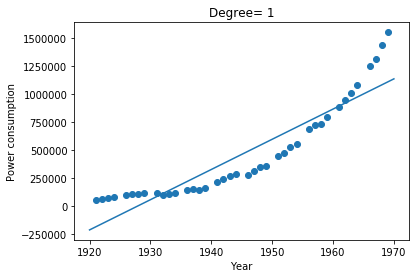

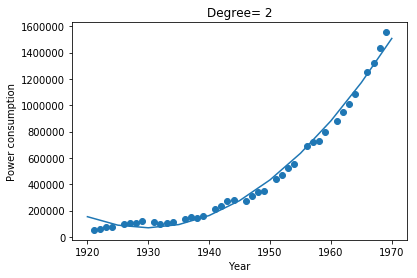

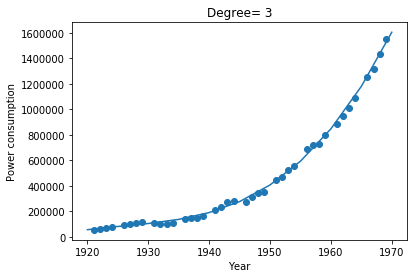

In [70]:
r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))
    # plot predictions and actual values against year
    a,ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
   # ax.scatter(X_train, y_train)
    #ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()

In [73]:
print(r2_test)
print(r2_train)

[0.816517046382681, 0.9876080502746136, 0.9984899918580936]
[0.8423747402176137, 0.990889674455328, 0.9979789884378093]
